In [1]:
# main
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
pd.set_option('display.max_columns', None)

# Sklearn --> Preprocessing
from sklearn.model_selection import train_test_split 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder , PowerTransformer 
from sklearn.pipeline import Pipeline , FeatureUnion
from sklearn_features.transformers import DataFrameSelector
from imblearn.over_sampling import SMOTE

# Other 
from sklearn.feature_selection import mutual_info_classif , SelectKBest
from sklearn.model_selection import RandomizedSearchCV

# Sklearn --> Models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier , RandomForestClassifier
from xgboost import XGBClassifier


# Slearn --> metrics
from sklearn.metrics import f1_score , classification_report , confusion_matrix


In [2]:
# reading for data
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# Drop columns
df.drop(columns=['RowNumber' , 'CustomerId' , 'Surname'] , axis=1 , inplace=True)

In [4]:
# check shape after drop columns
df.shape

(10000, 11)

In [5]:
# check about data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [6]:
# check NAN vlaues
df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
# Describe to categorical features
df.select_dtypes(include='O').describe().T

,count,unique,top,freq
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


In [8]:
# Describe to numerical features
df.select_dtypes(include='number').describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


In [9]:
cat_var = df.select_dtypes(include='O')
for i in cat_var:
    unique_var = df[i].unique()
    nunique = df[i].nunique()
    print(f'{i} : {unique_var} : {nunique}')

Geography : ['France' 'Spain' 'Germany'] : 3
Gender : ['Female' 'Male'] : 2


# EDA

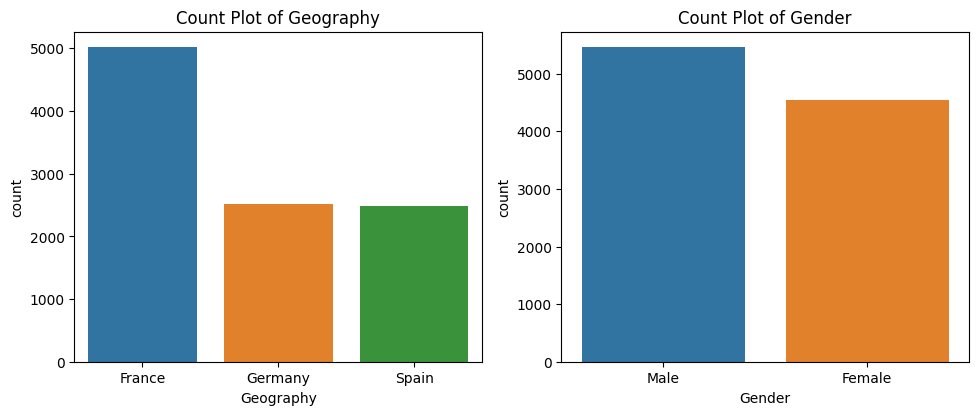

In [10]:
opj_var = ['Geography','Gender']
fig , axs = plt.subplots(nrows=2 , ncols=2 , figsize = (10 , 8))
axs = axs.flatten()
for i , var in enumerate(opj_var):
    sns.countplot(data=df , x = var , ax = axs[i] , order= df[var].value_counts().index)
    axs[i].set_xticklabels(axs[i].get_xticklabels() )
    axs[i].set_title(f"Count Plot of {var}")
    
fig.tight_layout()

fig.delaxes(axs[2])
fig.delaxes(axs[3])
plt.show()

In [11]:
# Gender Distribution by Geography

px.histogram(data_frame=df , x='Gender' , color='Geography' , barmode='group' , title = 'Gender Distribution by Geography')

In [12]:
# Gender Distribution by Tenure
px.histogram(data_frame=df, x='Gender', color='Tenure' , barmode='group' , title = 'Gender Distribution by Tenure')

In [13]:
# Gender Distribution by Number of Products
px.histogram(data_frame=df , x='Gender' , color='NumOfProducts' , barmode='group' , title = 'Gender Distribution by Number of Products')

In [14]:
# Gender Distribution of Customers' Exited Status
px.histogram(data_frame=df , x='Gender' , color='Exited', barmode='group' , title= 'Gender Distribution of Customers''Exited Status')

In [15]:
# Gender Distribution by Has credit card or not
px.histogram(data_frame=df , x = 'Gender' , color='HasCrCard' , barmode='group' , title= 'Gender Distribution by Has cradit card')

In [16]:
# Geography Distribution by has credit card or not
px.histogram(data_frame=df , x = 'Geography' , color='HasCrCard' , barmode='group' , title= 'Geography Distribution by has cradit card or not')

In [17]:
# Geography Distribution of Customers' Exited Status'
px.histogram(data_frame=df , x = 'Geography' , color='Exited' , barmode='group' , title= 'Geography Distribution of Customers'' Exited Status')

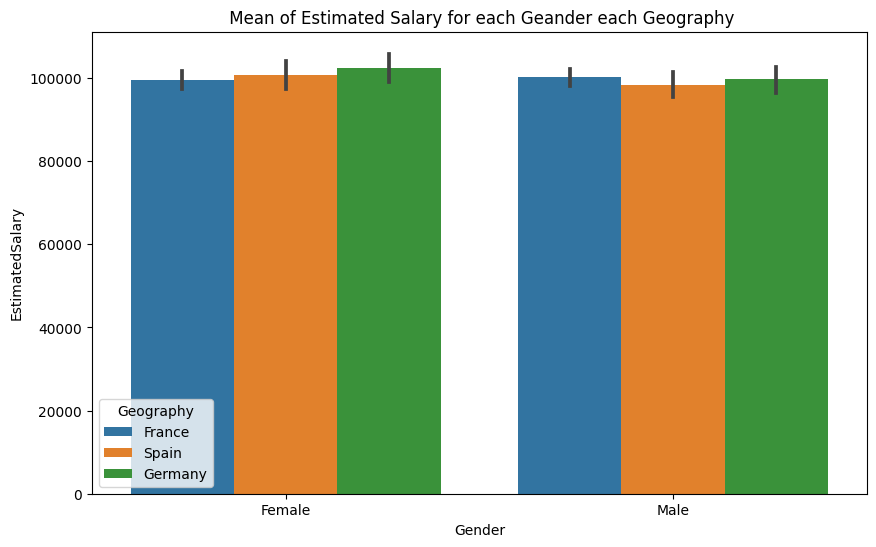

In [18]:
plt.figure(figsize=(10,6))
sns.barplot(data=df ,y= 'EstimatedSalary', x='Gender'  , hue='Geography', estimator='mean')
plt.title(' Mean of Estimated Salary for each Geander each Geography')
plt.show()

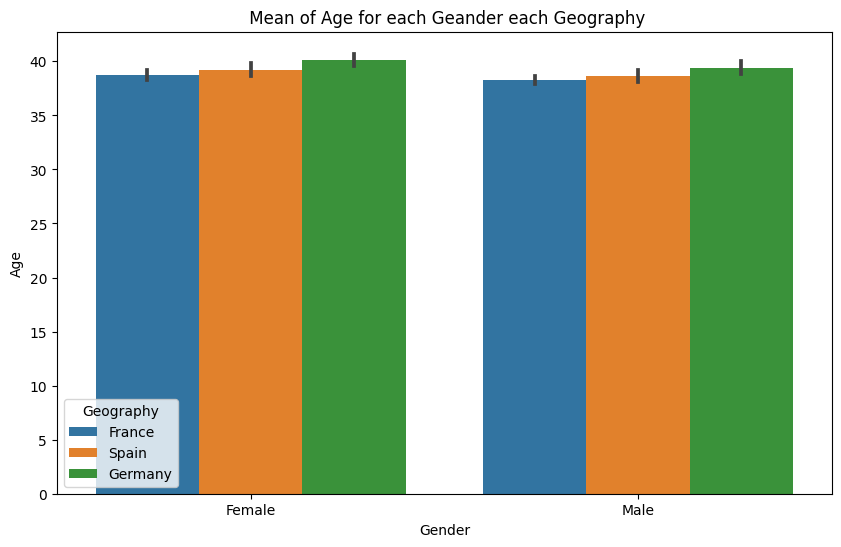

In [19]:
plt.figure(figsize=(10,6))
sns.barplot(data=df ,y= 'Age', x='Gender'  , hue='Geography', estimator='mean')
plt.title(' Mean of Age for each Geander each Geography')
plt.show()

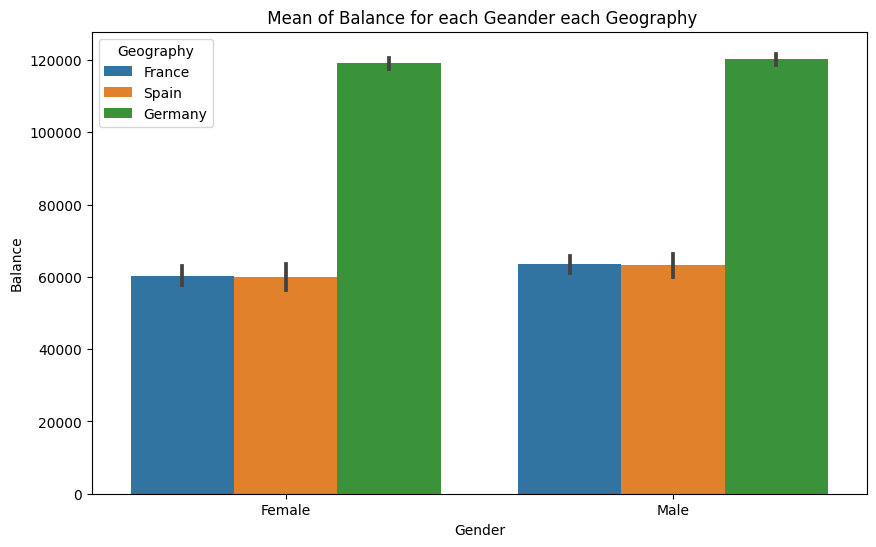

In [20]:
plt.figure(figsize=(10,6))
sns.barplot(data=df ,y= 'Balance', x='Gender'  , hue='Geography', estimator='mean')
plt.title(' Mean of Balance for each Geander each Geography')
plt.show()

In [21]:
pd.pivot_table(data=df , values='NumOfProducts' , index='Tenure' , columns= ['Geography' , 'Gender'] , aggfunc='count').T

Tenure             0    1    2    3    4    5    6    7    8    9    10
Geography Gender                                                       
France    Female  104  231  246  233  230  203  238  247  196  220  113
          Male    101  298  279  258  282  282  265  305  269  284  130
Germany   Female   56  137  129  121  104  122  106  108  119  114   77
          Male     49  127  146  140  128  137  121  117  145  155   51
Spain     Female   44  110  105  115  108  123  114  109  118   88   55
          Male     59  132  143  142  137  145  123  142  178  123   64

<Axes: >

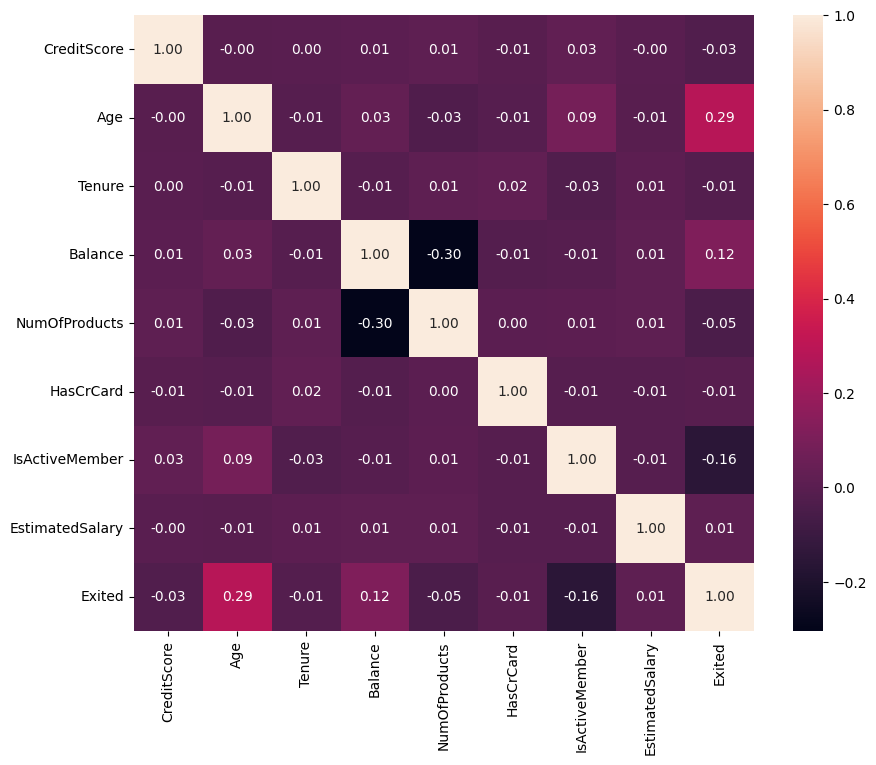

In [22]:
# Create heate map to clarify correlation between numerical features
df_corr = df.select_dtypes(include='number')
plt.figure(figsize= (10 , 8))
sns.heatmap(df_corr.corr() , fmt = '.2f' , annot = True)

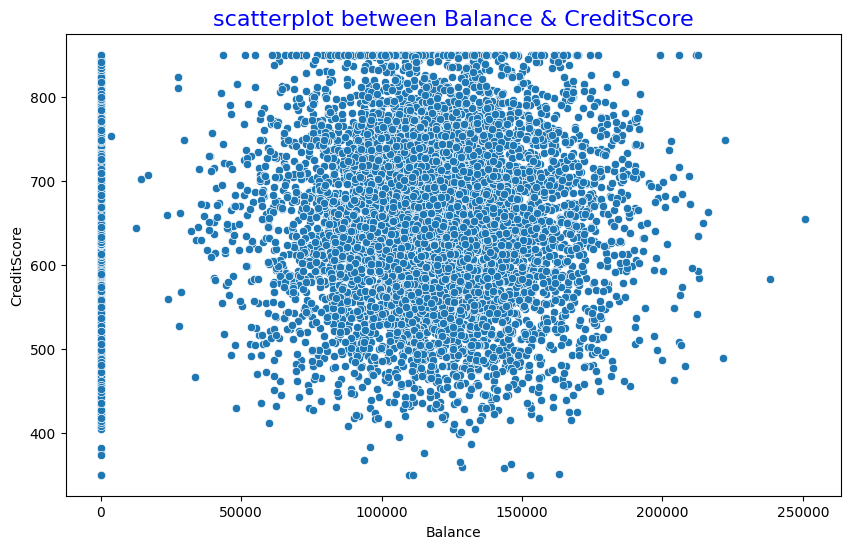

In [23]:
# check correlation between Balance and credit score
plt.figure(figsize=(10,6))
sns.scatterplot(data=df , x = 'Balance' , y = 'CreditScore')
plt.title('scatterplot between Balance & CreditScore' , color = 'blue' , fontsize = 16)
plt.show()

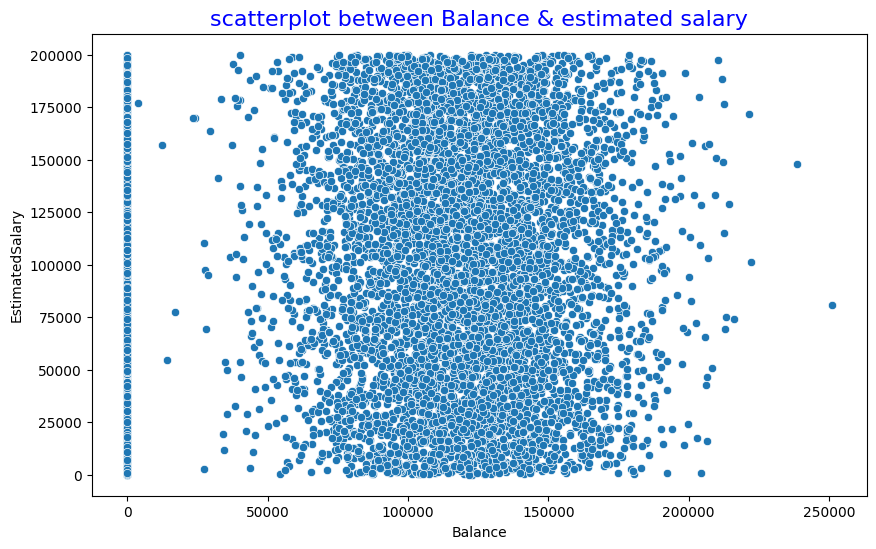

In [24]:
# check correlation between Balance and estimated salary
plt.figure(figsize=(10,6))
sns.scatterplot(data=df , x = 'Balance' , y = 'EstimatedSalary')
plt.title('scatterplot between Balance & estimated salary' , color = 'blue' , fontsize = 16)
plt.show()

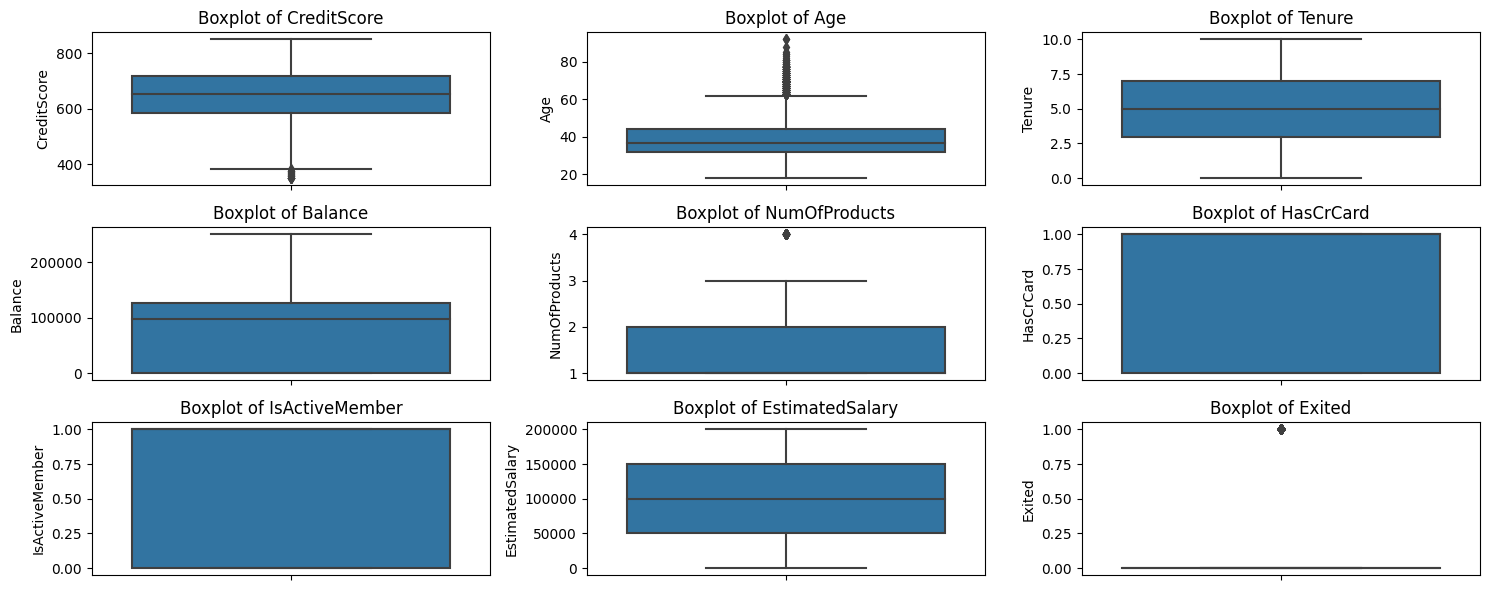

In [25]:
num_var = df.select_dtypes(include='number')
fig , axs = plt.subplots(nrows= 3 , ncols = 3 , figsize = (15 , 6))
axs = axs.flatten()

for i , var in enumerate(num_var):
    sns.boxplot(data=df , y = var , ax = axs[i]   )
    
    
    axs[i].set_title(f"Boxplot of {var}")


fig.tight_layout()



plt.show()

In [26]:
# Outlier handling using IQR 
def deal_with_outliers(df , value):
    # intial Q1
    Q1 = df[value].quantile(.25)
    # intial Q3
    Q3 = df[value].quantile(.75)
    # Define IQR
    IQR = Q3 - Q1
    # Define Lower value
    lower = Q1 - 1.5 * IQR
    # Define upper value
    upper = Q3 + 1.5 * IQR
    # replace values
    df[value] = np.where(df[value] > upper , upper ,
            np.where(df[value] < lower , lower , df[value]))
    
    return df[value]

In [27]:
# apply IQR 
df['Age'] = deal_with_outliers(df , 'Age')
df['CreditScore'] = deal_with_outliers(df , 'CreditScore')

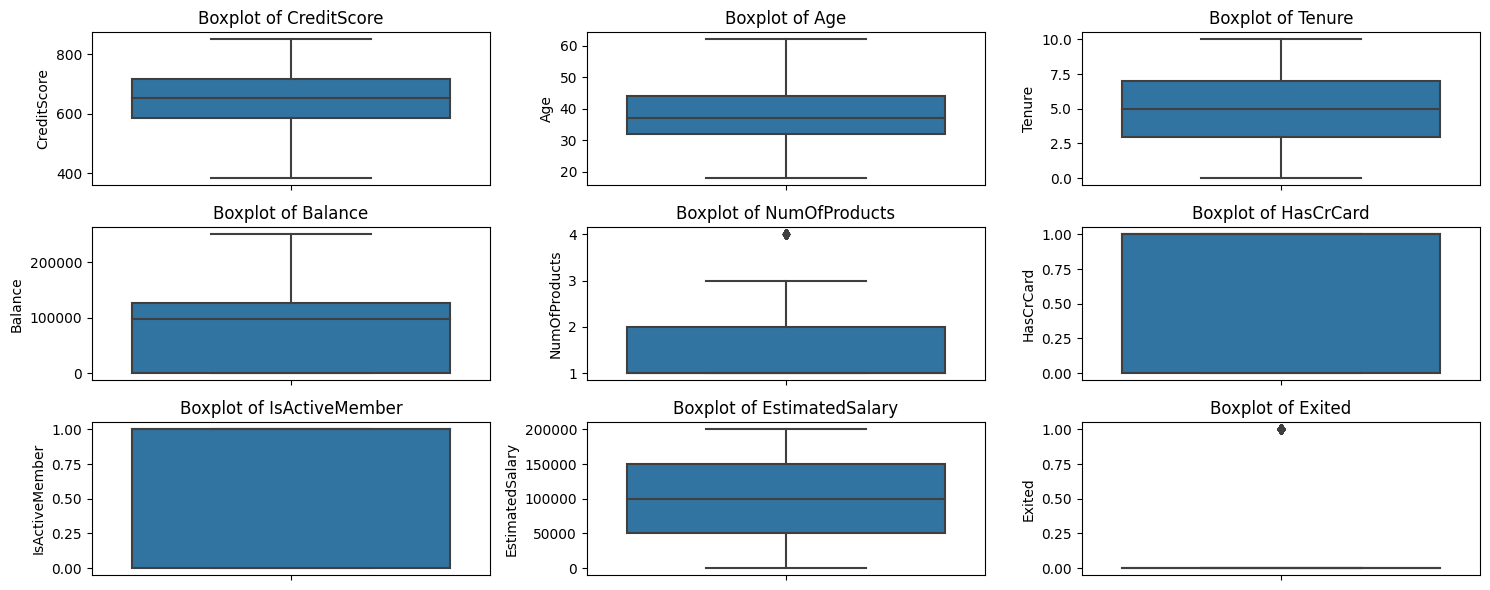

In [28]:
num_var = df.select_dtypes(include='number')
fig , axs = plt.subplots(nrows= 3 , ncols = 3 , figsize = (15 , 6))
axs = axs.flatten()

for i , var in enumerate(num_var):
    sns.boxplot(data=df , y = var , ax = axs[i]   )
    
    
    axs[i].set_title(f"Boxplot of {var}")


fig.tight_layout()



plt.show()

________________________________________________________

# Spliting

In [29]:
# To Features & Target 
X = df.drop(columns='Exited' , axis=1)
y = df['Exited']

<Axes: xlabel='Exited'>

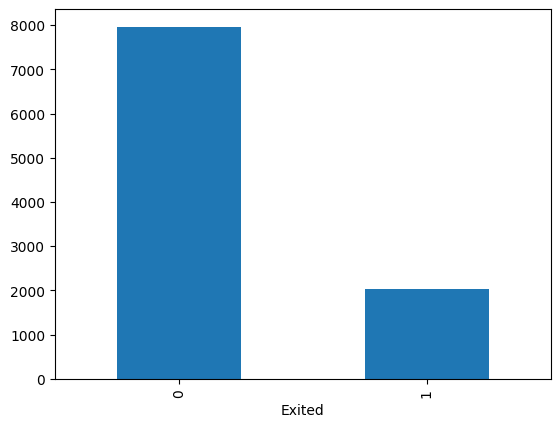

In [30]:
# There is imbalanced data 
y.value_counts().plot(kind='bar')

In [31]:
# Spliting to Train and Test to avoid overfiting 
X_train , X_test , y_train , y_test = train_test_split(X , y  , test_size=0.2 , shuffle=True ,
                  random_state=45 , stratify=y)


print('X_train.shap ' , X_train.shape)
print('y_train.shap ' , y_train.shape)
print('*****'*10)
print('X_test.shap ' , X_test.shape)
print('y_test.shap ' , y_test.shape)

X_train.shap  (8000, 10)
y_train.shap  (8000,)
**************************************************
X_test.shap  (2000, 10)
y_test.shap  (2000,)


___________________________________________________________________

# Data Preprocessing

In [32]:
# Slice to List
num_col = ['CreditScore' , 'Age' , 'Balance' , 'EstimatedSalary'] 
cat_col = ['Geography' , 'Gender']
ready_col =  list(set(X_train.columns.to_list()) - set(num_col) - set(cat_col))

In [33]:
## Pipeline

## Numerical : num_col -->> Imputing using median & Scaleing using PowerTransfomtion
## Categorical : cat_col -->> Imputing using mode & encoding 
## Ready col : ready_col -->> Imputing using mode

# For Numerical 
num_pip = Pipeline(steps=[
    ('DataFrameSelector' , DataFrameSelector(num_col)),
    ('Imputing' , SimpleImputer(strategy='median')),
    ('Scaleing' , PowerTransformer(method='yeo-johnson' , standardize=True))
])

## For categorical 

cat_pip = Pipeline(steps=[
    ('DataFrameSelector' , DataFrameSelector(cat_col)),
    ('Imputing' , SimpleImputer(strategy='most_frequent')),
    ('encoding' , OrdinalEncoder())
])


## For Ready col
ready_pip = Pipeline(steps=[
    ('DataFrameSelector' , DataFrameSelector(ready_col)),
    ('Imputing' , SimpleImputer(strategy='most_frequent'))
])

all_pip = FeatureUnion(transformer_list=[
    ('num_pip' , num_pip),
    ('cat_pip' , cat_pip),
    ('ready_pip', ready_pip)
]) 

X_train_final =  all_pip.fit_transform(X_train)
X_test_final = all_pip.transform(X_test)

In [34]:
print(X_train_final.shape , y_train.shape)
print('****'*10)
print(X_test_final.shape , y_test.shape)

(8000, 10) (8000,)
****************************************
(2000, 10) (2000,)


_________________________________________________________________________

## Deal with imbalanced data using SMOTE

In [35]:
y_train.value_counts()

Exited
0    6370
1    1630
Name: count, dtype: int64

In [36]:
over  = SMOTE(sampling_strategy=0.8)
X_train_final_res  ,  y_train_res=  over.fit_resample(X_train_final , y_train)

In [37]:
print(y_train_res.value_counts())
print('***'*10)
print(X_train_final_res.shape)

Exited
0    6370
1    5096
Name: count, dtype: int64
******************************
(11466, 10)


In [38]:
# prepare class_weights
vals_count = 1 - (np.bincount(y_train) / len(y_train))
vals_count = vals_count / np.sum(vals_count)  # Normalizing

dict_weights = {}
for i in range(2):
    dict_weights[i] = vals_count[i]

dict_weights

{0: 0.20375, 1: 0.79625}

________________________

## Building Models

### Logistic Regression

In [39]:
#Logistic Regression
Log_class = LogisticRegression(C=1.5 , random_state=45)

#fit
Log_class.fit(X_train_final_res , y_train_res)

# predict 
y_pred_Log_train = Log_class.predict(X_train_final)
y_pred_Log_test = Log_class.predict(X_test_final)

#Evaluate
score_Log_train = f1_score(y_train , y_pred_Log_train)
score_Log_test = f1_score(y_test , y_pred_Log_test)

print(f'this f1_score of score_Log_train {score_Log_train *100 :.3f}')
print(f'this f1_score of score_Log_test {score_Log_test *100 :.3f}')

this f1_score of score_Log_train 49.243
this f1_score of score_Log_test 49.770


## GaussianNB

In [40]:
# GaussianNB
GausNB = GaussianNB()

#fit
GausNB.fit(X_train_final_res , y_train_res)

# predict 
y_pred_GausNB_train = GausNB.predict(X_train_final)
y_pred_GausNB_test = GausNB.predict(X_test_final)

#Evaluate
score_GausNB_train = f1_score(y_train , y_pred_GausNB_train)
score_GausNB_test = f1_score(y_test , y_pred_GausNB_test)

print(f'this f1_score of score_GausNB_train {score_GausNB_train *100 :.3f}')
print(f'this f1_score of score_GausNB_test {score_GausNB_test *100 :.3f}')

this f1_score of score_GausNB_train 53.821
this f1_score of score_GausNB_test 53.005


## GradientBoosting

In [41]:
# GradientBoosting
Gts = GradientBoostingClassifier(learning_rate=0.1 , n_estimators=150 ,
                                 init=RandomForestClassifier(max_depth=11 , criterion='entropy' , 
                                                             max_features=0.7 , class_weight=dict_weights) , random_state=45,
                                 min_impurity_decrease= 0.15)

#fit
Gts.fit(X_train_final_res , y_train_res)

# predict 
y_pred_Gts_train = Gts.predict(X_train_final)
y_pred_Gts_test = Gts.predict(X_test_final)

#Evaluate
score_Gts_train = f1_score(y_train , y_pred_Gts_train)
score_Gts_test = f1_score(y_test , y_pred_Gts_test)

print(f'this f1_score of score_Gts_train {score_Gts_train *100 :.3f}')
print(f'this f1_score of score_Gts_test {score_Gts_test *100 :.3f}')

this f1_score of score_Gts_train 75.138
this f1_score of score_Gts_test 59.558


## RandomForest

In [42]:
# RandomForest
RF_class =  RandomForestClassifier(n_estimators = 200 , max_depth = 10 ,
                                 random_state = 45 , max_features=0.8 )
RF_class.fit(X_train_final_res , y_train_res)

# predict 
y_pred_RF_train =  RF_class.predict(X_train_final)
y_pred_RF_test =  RF_class.predict(X_test_final)

#Evaluate
score_RF_train = f1_score(y_train , y_pred_RF_train)
score_RF_test = f1_score(y_test , y_pred_RF_test)

print(f'this f1_score of score_RF_train {score_RF_train *100 :.3f}')
print(f'this f1_score of score_RF_test {score_RF_test *100 :.3f}')


this f1_score of score_RF_train 71.595
this f1_score of score_RF_test 58.643


In [46]:
# random_forest with Random search 
RF_class =  RandomForestClassifier(n_estimators = 200 , max_depth = 10 ,
                                 random_state = 45 , max_features=0.8 , class_weight=dict_weights)
param = {
    'n_estimators' : np.arange(100 , 1000 , 100),
    'max_depth' : np.arange(4 , 20 , 2) ,
   

}

random_forest_tun = RandomizedSearchCV(estimator=RF_class , param_distributions=param , cv=5 , scoring='f1' , n_iter=10 , verbose=4)

random_forest_tun.fit(X_train_final , y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END ....max_depth=12, n_estimators=400;, score=0.629 total time=  12.1s
[CV 2/5] END ....max_depth=12, n_estimators=400;, score=0.604 total time=  11.2s
[CV 3/5] END ....max_depth=12, n_estimators=400;, score=0.608 total time=  11.1s
[CV 4/5] END ....max_depth=12, n_estimators=400;, score=0.590 total time=  10.9s
[CV 5/5] END ....max_depth=12, n_estimators=400;, score=0.540 total time=  10.9s
[CV 1/5] END .....max_depth=8, n_estimators=700;, score=0.632 total time=  15.1s
[CV 2/5] END .....max_depth=8, n_estimators=700;, score=0.589 total time=  15.8s
[CV 3/5] END .....max_depth=8, n_estimators=700;, score=0.611 total time=  14.8s
[CV 4/5] END .....max_depth=8, n_estimators=700;, score=0.623 total time=  14.3s
[CV 5/5] END .....max_depth=8, n_estimators=700;, score=0.587 total time=  16.7s
[CV 1/5] END ....max_depth=18, n_estimators=100;, score=0.577 total time=   3.1s
[CV 2/5] END ....max_depth=18, n_estimators=100;

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(class_weight={0: 0.20375,
                                                                  1: 0.79625},
                                                    max_depth=10,
                                                    max_features=0.8,
                                                    n_estimators=200,
                                                    random_state=45),
                   param_distributions={'max_depth': array([ 4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([100, 200, 300, 400, 500, 600, 700, 800, 900])},
                   scoring='f1', verbose=4)

In [47]:
random_forest_tun.best_score_

0.6088752655391628

In [48]:
random_forest_tun.best_params_

{'n_estimators': 900, 'max_depth': 8}

In [49]:
random_forest_tun.best_estimator_

RandomForestClassifier(class_weight={0: 0.20375, 1: 0.79625}, max_depth=8,
                       max_features=0.8, n_estimators=900, random_state=45)

In [50]:
RF_class_tuned =  random_forest_tun.best_estimator_
RF_class_tuned.fit(X_train_final , y_train)
# predict 
y_pred_RF_tuned_train =  RF_class_tuned.predict(X_train_final)
y_pred_RF_tuned_test =  RF_class_tuned.predict(X_test_final)

#Evaluate
score_RF_tuned_train = f1_score(y_train , y_pred_RF_tuned_train)
score_RF_tuned_test = f1_score(y_test , y_pred_RF_tuned_test)

print(f'this f1_score of score_RF_train {score_RF_tuned_train *100 :.3f}')
print(f'this f1_score of score_RF_test {score_RF_tuned_test *100 :.3f}')

this f1_score of score_RF_train 69.725
this f1_score of score_RF_test 60.593


## XGBClassifier

In [51]:
XG_class = XGBClassifier(objective='binary:logistic' , subsample = 0.9 , colsample_bytree = 0.7)

XG_class.fit(X_train_final_res, y_train_res)

# predict 
y_pred_XG_train = XG_class.predict(X_train_final)
y_pred_XG_test = XG_class.predict(X_test_final)

#Evaluate
score_XG_train = f1_score(y_train , y_pred_XG_train)
score_XG_test = f1_score(y_test , y_pred_XG_test)

print(f'this f1_score of score_XG_train {score_XG_train *100 :.3f}')
print(f'this f1_score of score_XG_test {score_XG_test *100 :.3f}')


this f1_score of score_XG_train 85.137
this f1_score of score_XG_test 59.482


## modeling after  mutual_info_classif method

In [43]:
X_train_final_reduced =  pd.DataFrame(X_train_final , columns=['CreditScore' , 'Age' , 'Balance' , 'EstimatedSalary',
                                                  'Geography' , 'Gender' , 'Tenure', 'NumOfProducts', 'IsActiveMember', 'HasCrCard'])
X_train_final_reduced.head()

,CreditScore,Age,Balance,EstimatedSalary,Geography,Gender,Tenure,NumOfProducts,IsActiveMember,HasCrCard
0,-0.925630,-0.629423,0.891618,0.707237,1.0,1.0,1.0,1.0,6.0,0.0
1,-0.844041,-0.756821,0.754928,0.796673,2.0,1.0,0.0,1.0,1.0,0.0
2,-0.680458,0.266437,0.881080,0.671256,1.0,0.0,1.0,2.0,3.0,0.0
3,1.267801,-0.386091,-1.312832,1.160346,0.0,1.0,1.0,2.0,9.0,0.0
4,0.572986,0.913915,0.836420,0.729225,1.0,0.0,1.0,1.0,10.0,0.0


In [44]:
X_train_final_res_reduced =  pd.DataFrame(X_train_final_res , columns=['CreditScore' , 'Age' , 'Balance' , 'EstimatedSalary',
                                                  'Geography' , 'Gender' , 'Tenure', 'NumOfProducts', 'IsActiveMember', 'HasCrCard'])

X_train_final_res_reduced.head()

,CreditScore,Age,Balance,EstimatedSalary,Geography,Gender,Tenure,NumOfProducts,IsActiveMember,HasCrCard
0,-0.925630,-0.629423,0.891618,0.707237,1.0,1.0,1.0,1.0,6.0,0.0
1,-0.844041,-0.756821,0.754928,0.796673,2.0,1.0,0.0,1.0,1.0,0.0
2,-0.680458,0.266437,0.881080,0.671256,1.0,0.0,1.0,2.0,3.0,0.0
3,1.267801,-0.386091,-1.312832,1.160346,0.0,1.0,1.0,2.0,9.0,0.0
4,0.572986,0.913915,0.836420,0.729225,1.0,0.0,1.0,1.0,10.0,0.0


In [45]:
X_test_final_reduced =  pd.DataFrame(X_test_final , columns=['CreditScore' , 'Age' , 'Balance' , 'EstimatedSalary',
                                                  'Geography' , 'Gender' , 'Tenure', 'NumOfProducts', 'IsActiveMember', 'HasCrCard'])
X_test_final_reduced.head()

,CreditScore,Age,Balance,EstimatedSalary,Geography,Gender,Tenure,NumOfProducts,IsActiveMember,HasCrCard
0,-1.291050,-0.888370,-1.312832,0.850131,2.0,0.0,0.0,2.0,5.0,1.0
1,0.898422,-0.505922,-1.312832,0.337060,0.0,0.0,1.0,2.0,4.0,0.0
2,1.035383,0.913915,0.773219,-0.707153,0.0,0.0,1.0,2.0,7.0,0.0
3,0.824792,-0.386091,-1.312832,0.514165,0.0,1.0,1.0,2.0,1.0,1.0
4,-2.112058,-0.156618,0.582561,-0.659691,2.0,1.0,0.0,2.0,6.0,1.0


In [46]:
Select = SelectKBest(mutual_info_classif , k=7)
Select.fit_transform(X_train_final_reduced , y_train)
col_selected =  X_train_final_reduced.columns[Select.get_support()].to_list()
col_selected

['Age',
 'Balance',
 'Geography',
 'Gender',
 'NumOfProducts',
 'IsActiveMember',
 'HasCrCard']

In [47]:
drop_col = []
for col in X_train_final_reduced.columns:
    
        if col not in col_selected:
            drop_col.append(col)
drop_col


['CreditScore', 'EstimatedSalary', 'Tenure']

In [48]:
X_train_final_reduced.drop(columns=drop_col , axis=1 , inplace=True)
X_train_final_res_reduced.drop(columns=drop_col , axis=1 , inplace=True)
X_test_final_reduced.drop(columns=drop_col , axis=1 , inplace=True)

## GradientBoosting

In [49]:
Gts_reduced = GradientBoostingClassifier(learning_rate=0.1 , n_estimators=150 ,
                                 init=RandomForestClassifier(max_depth=11 , criterion='entropy' , 
                                                             max_features=0.7) , random_state=45,
                                 min_impurity_decrease= 0.15)

#fit
Gts_reduced.fit(X_train_final_res_reduced , y_train_res)

# predict 
y_pred_Gts_reduced_train = Gts_reduced.predict(X_train_final_reduced)
y_pred_Gts_reduced_test = Gts_reduced.predict(X_test_final_reduced)

#Evaluate
score_Gts_reduced_train = f1_score(y_train , y_pred_Gts_reduced_train)
score_Gts_reduced_test = f1_score(y_test , y_pred_Gts_reduced_test)

print(f'this f1_score of score_Gts_reduced_train {score_Gts_reduced_train *100 :.3f}')
print(f'this f1_score of score_Gts_reduced_test {score_Gts_reduced_test *100 :.3f}')

this f1_score of score_Gts_reduced_train 70.808
this f1_score of score_Gts_reduced_test 60.430


In [50]:
Gts_with_class = GradientBoostingClassifier(learning_rate=0.1 , n_estimators=150 ,
                                 init=RandomForestClassifier(max_depth=11 , criterion='entropy' , 
                                                             max_features=0.7 , class_weight=dict_weights) , random_state=45,
                                 min_impurity_decrease= 0.15)

#fit
Gts_with_class.fit(X_train_final_reduced , y_train)

# predict 
y_pred_Gts_class_train = Gts_with_class.predict(X_train_final_reduced)
y_pred_Gts_class_test = Gts_with_class.predict(X_test_final_reduced)

#Evaluate
score_Gts_class_train = f1_score(y_train , y_pred_Gts_class_train)
score_Gts_class_test = f1_score(y_test , y_pred_Gts_class_test)

print(f'this f1_score of score_Gts_train {score_Gts_class_train *100 :.3f}')
print(f'this f1_score of score_Gts_test {score_Gts_class_test *100 :.3f}')

this f1_score of score_Gts_train 73.098
this f1_score of score_Gts_test 54.720


## RandomForest 

In [51]:
# RandomForest
RF_class_reduced =  RandomForestClassifier(n_estimators = 250 , max_depth = 9 ,
                                 random_state = 45 , max_features=0.8 , criterion='log_loss')
RF_class_reduced.fit(X_train_final_res_reduced , y_train_res)

# predict 
y_pred_RF_reduced_train =  RF_class_reduced.predict(X_train_final_reduced)
y_pred_RF_reduced_test =  RF_class_reduced.predict(X_test_final_reduced)

#Evaluate
score_RF_reduced_train = f1_score(y_train , y_pred_RF_reduced_train)
score_RF_reduced_test = f1_score(y_test , y_pred_RF_reduced_test)

print(f'this f1_score of score_RF_reduced_train {score_RF_reduced_train *100 :.3f}')
print(f'this f1_score of score_RF_reduced_test {score_RF_reduced_test *100 :.3f}')


this f1_score of score_RF_reduced_train 65.250
this f1_score of score_RF_reduced_test 60.495


In [54]:
print(classification_report(y_test , y_pred_RF_reduced_test))

              precision    recall  f1-score   support

           0       0.89      0.92      0.91      1593
           1       0.64      0.57      0.60       407

    accuracy                           0.85      2000
   macro avg       0.77      0.74      0.76      2000
weighted avg       0.84      0.85      0.84      2000



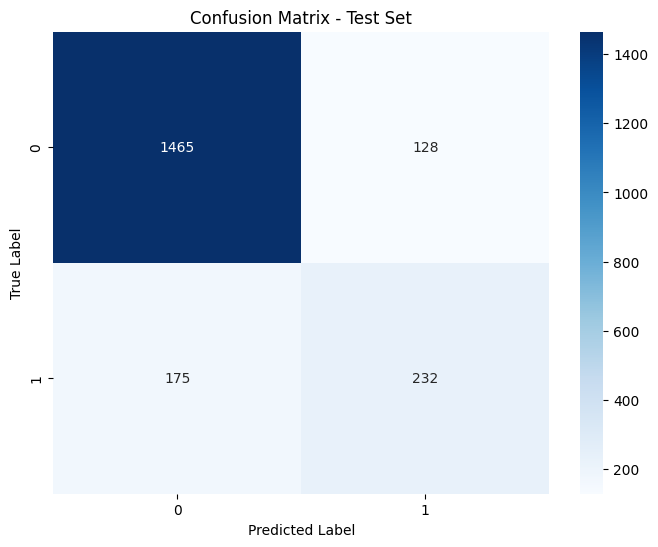

In [56]:
cm_test = confusion_matrix(y_test, y_pred_RF_reduced_test)
# Plot confusion matrix for test set
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Text(0.5, 1.0, 'F1_score for random forest ')

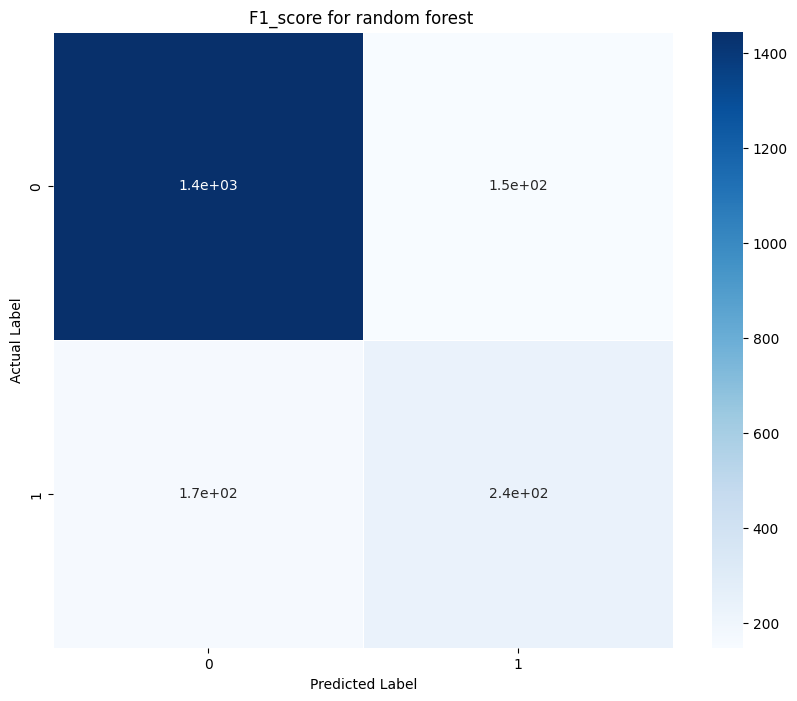

In [131]:
con = confusion_matrix(y_test , y_pred_RF_reduced_test)
plt.figure(figsize=(10,8))
sns.heatmap(data=con , linewidths=0.5 , annot=True , cmap='Blues')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('F1_score for random forest '.format(f1_score(y_test , y_pred_RF_reduced_test)))

## XGBClassifier
 

In [110]:
XG_class = XGBClassifier(objective='binary:logistic' , subsample = 0.8 , colsample_bytree = 0.8)

XG_class.fit(X_train_final_res_reduced, y_train_res)

# predict 
y_pred_XG_train = XG_class.predict(X_train_final_reduced)
y_pred_XG_test = XG_class.predict(X_test_final_reduced)

#Evaluate
score_XG_train = f1_score(y_train , y_pred_XG_train)
score_XG_test = f1_score(y_test , y_pred_XG_test)

print(f'this f1_score of score_XG_train {score_XG_train *100 :.3f}')
print(f'this f1_score of score_XG_test {score_XG_test *100 :.3f}')


this f1_score of score_XG_train 61.908
this f1_score of score_XG_test 56.801
